# Image Processing in Python
### Tanmoy Dasgupta
thetdg@live.com | Assistant Professor | Department of Electrical Engineering | Techno India University, Kolkata

This tutorial is supposed to be an introduction to the different scientific packages in python that can be utilized to perform different tasks related to image processing. I have inherently assumed that the reader already has good exposure on core **Python** and some exposure on **Numpy**, **Scipy** and **Matplotlib**. It is also assumed that the reader knows how to start **IPython Notebook**s. 

This notebook contains materails that are useful and new. However, things that are useful are not new and the things that are new are not always useful. Feel free to improve it and send me suggestions.


### Packages You Need

[NumPy](http://www.numpy.org/)

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
1. a powerful N-dimensional array object
2. sophisticated (broadcasting) functions
3. tools for integrating C/C++ and Fortran code
4. useful linear algebra, Fourier transform, and random number capabilities

[SciPy](http://www.scipy.org/) 

The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

[Matplotlib](http://matplotlib.org/) 

Matplotlib is a python 2D and 3D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in python scripts, the python and ipython shell (ala MATLAB® or Mathematica®), web application servers, and different graphical user interface toolkits.

[IPython](http://ipython.org/) 

IPython provides a rich architecture for interactive computing with:

1. Powerful interactive shells (terminal and Qt-based).
2. A browser-based notebook with support for code, rich text, mathematical expressions, inline plots and other rich media.
3. Support for interactive data visualization and use of GUI toolkits.
4. Flexible, embeddable interpreters to load into your own projects.
5. Easy to use, high performance tools for parallel computing.

[Python Imaging Library](https://github.com/python-pillow/Pillow) and [Scikit-Image](http://scikit-image.org/)

These packages (among many others) have custom modules for image processing.

[OpenCV](http://opencv.org/)

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. The library has more than 2500 optimized algorithms, which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms. It has C++, C, Python, Java and MATLAB interfaces and supports Windows, Linux, Android and Mac OS. 

### Installing

Installing all these packages might seem a little too much! Don't worry. You can install all of the above (and many other packages) just by downloading and installing any of the following **Python Distribution(s)** : 

[Anaconda](https://www.anaconda.com/products/distribution) Free (as in 'Freedom'). Availabe for Linux, Mac and Windows.

### Getting Started

Unlike almost all other IPython notebooks, I will **NOT** import **Pylab Magic**. But if you really want to, you can do it by uncommenting (removing the #) and running the following line.

In [1]:
#%pylab inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In case you didn't have any error so far, you're good to go!

### What is an image anyway?
**Short answer** It is just a 2 dimensional array (grayscale image) or a set of Three 2 dimensional arrays (colour image).

**Long answer**

Loading an Image as a Numpy array

In [2]:
A = plt.imread('images/macaw.jpg')
print(A)

[[[ 21  22   8]
  [ 26  24   9]
  [ 30  27  10]
  ...
  [ 25  52  82]
  [ 33  56  87]
  [ 24  37  69]]

 [[ 22  23   9]
  [ 27  25  10]
  [ 30  27  10]
  ...
  [ 29  53  99]
  [ 34  55  98]
  [ 19  31  73]]

 [[ 23  24  10]
  [ 28  26  11]
  [ 31  28  11]
  ...
  [ 35  57 117]
  [ 34  54 107]
  [ 15  25  76]]

 ...

 [[203 216 144]
  [112 128  65]
  [ 86 106  55]
  ...
  [ 91 109  61]
  [ 93 103  43]
  [ 78  79  21]]

 [[179 192 120]
  [ 95 113  51]
  [ 69  93  43]
  ...
  [ 81  94  74]
  [ 97 105  58]
  [ 87  90  33]]

 [[114 130  59]
  [ 78  98  37]
  [ 85 113  64]
  ...
  [ 61  73  73]
  [ 93 101  64]
  [ 88  91  38]]]


Check the data type and the size of the array $A$

In [3]:
print(np.shape(A))
print(type(A))
print(A.dtype)

(267, 400, 3)
<class 'numpy.ndarray'>
uint8


So, our image is a colour image and it has a resolution of $400 \times 267$. It is imported as an N-dimenstional array object available from numpy.

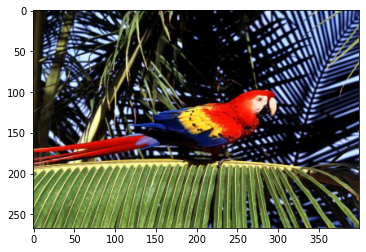

In [4]:
plt.imshow(A)
plt.show()

Now, let us segrigate the **Red**, **Green** and the **Blue** channels

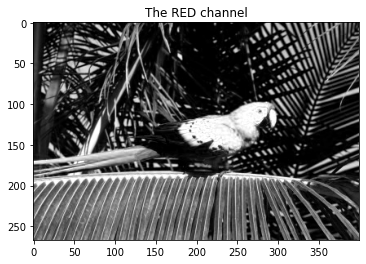

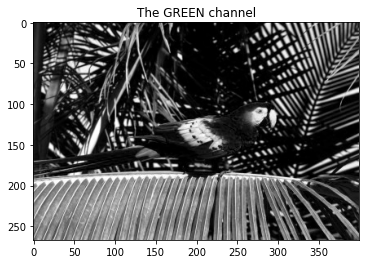

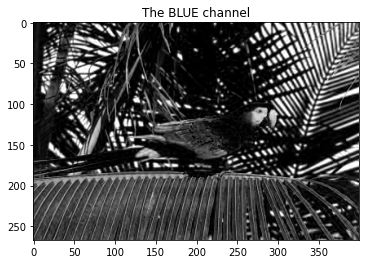

In [5]:
A_red = A[:, :, 0]
A_green = A[:, :, 1]
A_blue = A[:, :, 2]

plt.figure()
plt.imshow(A_red, cmap='gray') #For a single channel / grayscale image you need to mention the colourmap
plt.title('The RED channel')

plt.figure()
plt.imshow(A_green, cmap='gray')
plt.title('The GREEN channel')

plt.figure()
plt.imshow(A_blue, cmap='gray')
plt.title('The BLUE channel')

plt.show()

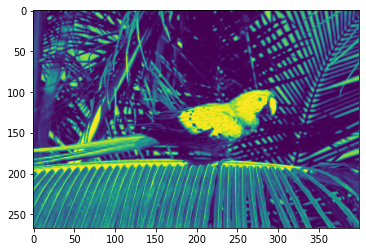

In [6]:
plt.figure()
plt.imshow(A_red)
plt.show()

Now that we know how to read and display an image. Let us do this:

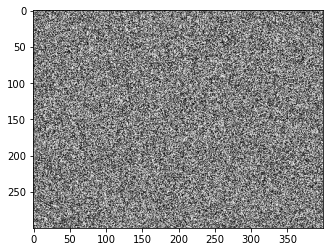

In [7]:
#create a random uint8 array of size 300x300 with numbers from 0 to 255
x = np.random.randint(0, 256, (300, 400)).astype('uint8')
plt.imshow(x, cmap='gray');

See! A random image! Now let us create a random color image!

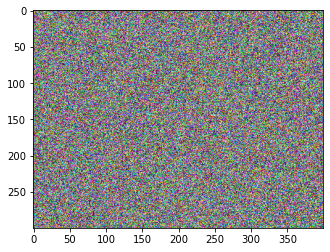

In [8]:
X = np.random.randint(0, 256, (300, 400, 3)).astype('uint8')
plt.imshow(X);

### Image Enhancement Techniques
The principal objective of Image Enhancement is to process an image so that the result is more suitable than the original image for a particular application.

However, there are mainly TWO approaches towards image enhancement. A **saptial domain** approach and a **frequency domain** approach.

#### Spatial Domain Approach
It refers to the image plane itself and involves direct manipuation of the pixels of an image.

#### Frequency Domain Technique
Frequency domain processing techniques are based on modifying the Fourier Transform of an image.

### Spatial Domain Approaches
Image processing functions in the spatial domain are often of the form $ g(x,y) = \mathcal{T}[f(x, y)]$, where, $f(x, y)$ is the input image and $g(x, y)$ is the processed output image. $\mathcal{T}$ is an operation on $f$ defined over some neighbourhood of the pixel at the location $(x, y)$. Usually a neighbourhood of $3\times 3$ (or sometimes $1\times 1$) is assumed about the pixel at $(x, y)$.

Spatial domain techniques include **Pint processing**, **Image subtraction**, **Spatial filtering**, **Image averaging**, etc.

Point processing include **Contrast stretching**, **Gray-level slicing**, **Bit-plane slicing**, **Histogram processing**, etc. 

Spatial filtering includes **Low pass filtering**, **Median filtering**, **High-pass filtering**, etc.

### Histogram and Contrast
The word **histogram** in the context of an image simply means a histogram plot of the pixel intensity vs number of pixels.

Now, let us go back to the original image of the Macaw. Let us plot the histogram of the pixel intensity. First convert the original image into a grayscale image. This RGB to grayscale conversion would use the formula (more on this formula later)
$$X_{Gray} =  [0.299\quad 0.587\quad 0.144]  \cdot \left[\begin{array}{c}
X_{R}\\
X_{G}\\
X_{B}
\end{array}\right].$$

In [9]:
from PIL import Image #Python Imaging Library


A_gray = Image.open('images/macaw.jpg','r')
A_gray = A_gray.convert('L')

temp = np.asarray(A_gray.getdata(), dtype=np.float64).reshape((A_gray.size[1], A_gray.size[0]))
A_gr = np.asarray(temp, dtype=np.uint8)

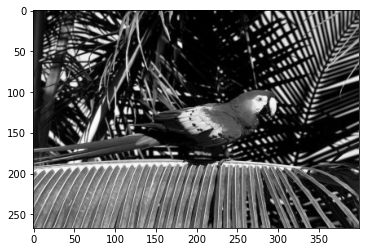

In [10]:
plt.imshow(A_gr, cmap='gray')
plt.show()

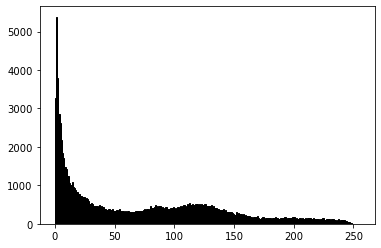

In [11]:
plt.hist(A_gr.flatten(), 256, range=(0, 255), fc='k', ec='k');

Let us now narrow the contrast the image

#### Contrast Stretching
The possible causes for low contrast images are
1. poor illumination
2. lack of dynamic range in imaging sensor
3. wrong setting of the lens aperture during image acquisition.

Contrast stretching attempts to increase the dynamic range of the gray levels of the image being processed. For a neighbourhood of size $1 \times 1$, contast stretching is usually done by a *gray level transformation* of the form $s = \mathcal{W}[r]$, where $r$ is the gray level of $f(x, y)$ at $(x, y)$, $s$ is the gray level of $g(x, y)$ at $(x, y)$ and $\mathcal{W}$ is a graylevel transformation function.

Now, let us load a low contrast image.

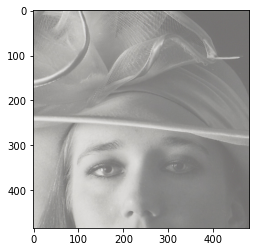

In [12]:
girl = plt.imread('images/low_contrast.jpg')
plt.imshow(girl);

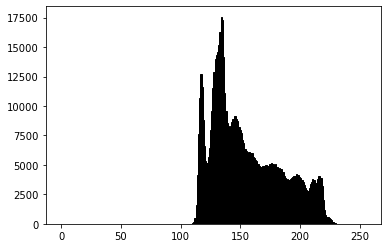

In [13]:
plt.hist(girl.flatten(), 256, range=(0, 255), fc='k', ec='k');

In [14]:
maxi = np.amax(girl)
mini = np.amin(girl)
intensity_range = maxi - mini
print('lowest intensity:', mini, ', highest intensity:', maxi, ', spread:', intensity_range)

lowest intensity: 103 , highest intensity: 235 , spread: 132


As we can see that the image has low contrast, we will use the following transformation function to stretch the contrast of the image. 
$$s=\mathcal{W}(r)=\begin{cases}
0, & r<103\\
\dfrac{255}{132}(r-103), & 103\le r\le235\\
255, & r>235
\end{cases}$$

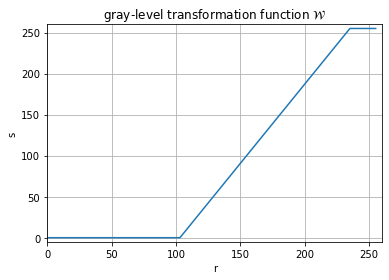

In [15]:
r = np.arange(0, 256, 1)
s = np.zeros(np.shape(r))
s = (255/intensity_range)*(r - mini)
s[r<mini] = 0
s[r>maxi] = 255

plt.plot(r, s)
plt.axis([0, 260, -5, 260])
plt.xlabel('r')
plt.ylabel('s')
plt.title('gray-level transformation function $\mathcal{W}$')
plt.grid()

In [16]:
girl_high = ((girl.astype('float64') - mini) * 255 / intensity_range).astype('uint8')

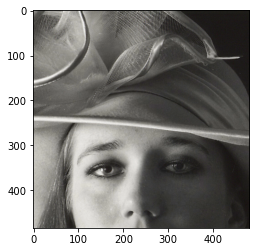

In [17]:
plt.imshow(girl_high, cmap='gray');

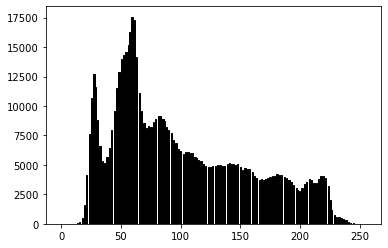

In [18]:
plt.hist(girl_high.flatten(), 256, range=(0, 255), fc='k', ec='k');

See that, now the pixel intensities are spread over wider range $[0, 255]$. This is known as linear contrast streatching.

#### Negative
If you subtract the pixel intensities of the original image from 255, what you get is essentially the *negative* of the image.
$$ X_{neg} = \left[\begin{array}{ccc}
255 & \cdots & 255\\
\vdots & \ddots & \vdots\\
255 & \cdots & 255
\end{array}\right]
 _{m\times n} - X_{m\times n}.$$
 
 The transformation function in this case looks like this.

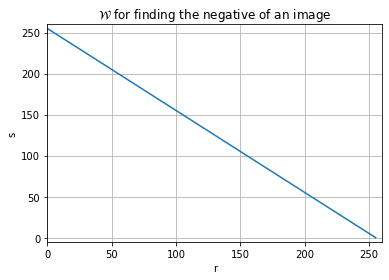

In [19]:
r = np.arange(0, 256, 1)
s = np.zeros(np.shape(r))
s = 255 - r

plt.plot(r, s)
plt.axis([0, 260, -5, 260])
plt.xlabel('r')
plt.ylabel('s')
plt.title('$\mathcal{W}$ for finding the negative of an image')
plt.grid()

In [20]:
girl_neg = (255*np.ones(np.shape(girl_high)) - girl_high).astype('uint8')

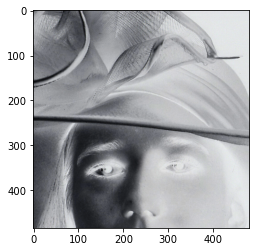

In [21]:
plt.imshow(girl_neg, cmap='gray');

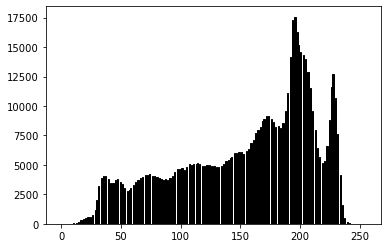

In [22]:
plt.hist(girl_neg.flatten(), 256, range=(0, 255), fc='k', ec='k');

Compare the histogram of the negative with that of the original.

#### Dynamic Range Compression

*to be done later*

#### Power Law (Gamma) Transformations / Gamma Corrections
Gamma correction involves a nonlinear transformation of the form $s = \mathcal{W}[r] = 255\,c\,\left(\dfrac{r}{255}\right)^\gamma$, where, $c$ and $\gamma$ are positive constants. The following plot shows a $r$-vs-$s$ plot for different values of $\gamma$.


Text(0.5, 1.0, 'Gamma correction $s = 255\\,c\\,(r/255)^\\gamma$')

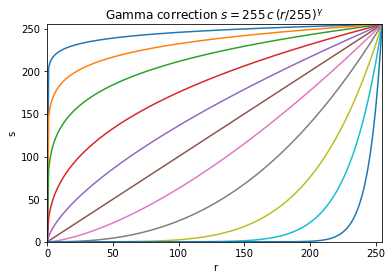

In [23]:
c = 1
r = np.arange(0, 256)

for gamma in [0.04, 0.10, 0.20, 0.40, 0.67, 1, 1.5, 2.5, 5, 10, 25]:
    s = 255*c*(r/255)**gamma
    plt.plot(r, s)
    
plt.axis([0, 255, 0, 255])
plt.xlabel('r')
plt.ylabel('s')
plt.title('Gamma correction $s = 255\,c\,(r/255)^\gamma$')

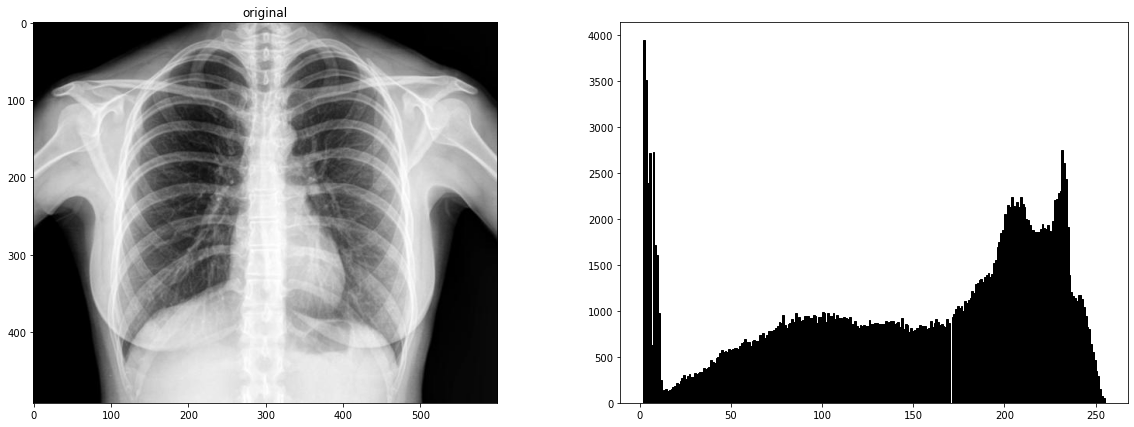

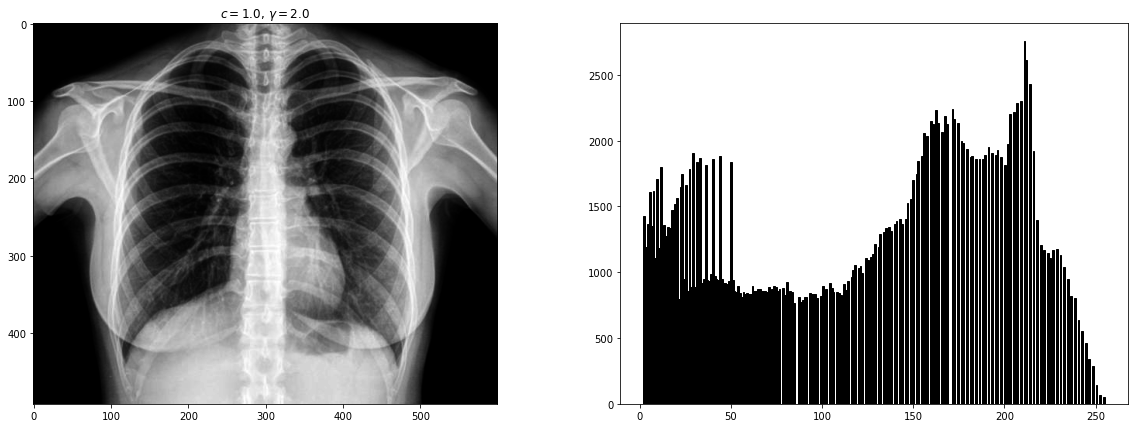

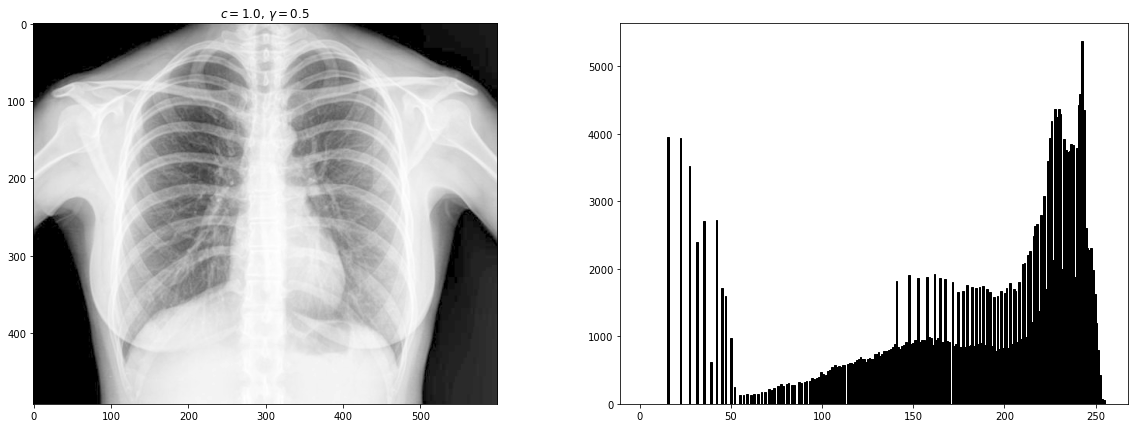

In [24]:
xray_orig = plt.imread('images/chestxray.jpg')
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.imshow(xray_orig, cmap='gray')
plt.title('original')
plt.subplot(1, 2, 2)
plt.hist(xray_orig.flatten(), 256, range=(2, 255), fc='k', ec='k');

c = 1.0
gamma = 2.0
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
xray_gamma1 = (255*c*(xray_orig / 255)**gamma).astype('uint8')
plt.imshow(xray_gamma1, cmap='gray')
plt.title('$c=1.0$, $\gamma = 2.0$')
plt.subplot(1, 2, 2)
plt.hist(xray_gamma1.flatten(), 256, range=(2, 255), fc='k', ec='k');

c = 1.0
gamma = 0.5
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
xray_gamma2 = (255*c*(xray_orig / 255)**gamma).astype('uint8')
plt.imshow(xray_gamma2, cmap='gray')
plt.title('$c=1.0$, $\gamma = 0.5$')
plt.subplot(1, 2, 2)
plt.hist(xray_gamma2.flatten(), 256, range=(2, 255), fc='k', ec='k');

#### Gray-level Slicing
Sometimes we need to highlight a specific range of gray levels in a image. Possible application areas are *finding masses of water in satellite imagery*, *enhancement of flaws in x-ray images*, etc.

There are two basic approaches towards gray-level slicing.
1. **Binary Thresholding** : all gray levels in the range of interest are displayed using a high value and the rest using a low value.
2. **Gradual Thresholding** : desired range of gray levels are brightened but the background and the gray-level tonalities are preserved.

For exaple, let the range of interest be in $[120\,\, 180]$. Then the corresponding transformation functions would look like the following.

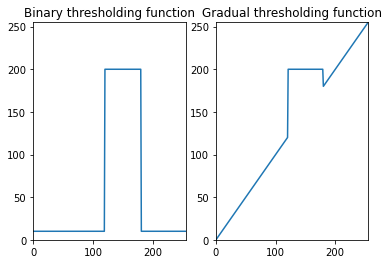

In [25]:
r = np.arange(0, 256)
s = np.zeros(np.shape(r))
s[:] = 200
s[r<120] = 10
s[r>180] = 10
plt.subplot(1, 2, 1)
plt.plot(r, s)
plt.axis([0, 255, 0, 255])
plt.title('Binary thresholding function')

r = np.arange(0, 256)
s = np.arange(0, 256)
a = r>120
b = r<180
s[a * b] = 200
plt.subplot(1, 2, 2)
plt.plot(r, s)
plt.axis([0, 255, 0, 255])
plt.title('Gradual thresholding function');

Now let us use these ideas in real life!

Load Scikit-image. It has built-in image data sets. More at http://scikit-image.org/docs/dev/api/skimage.data.html

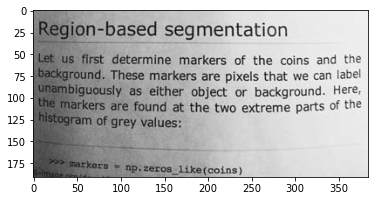

In [26]:
from skimage import data


scanned = data.page()
plt.imshow(scanned, cmap='gray');

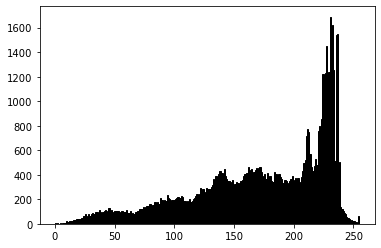

In [27]:
plt.hist(scanned.flatten(), 256, range=(0, 255), fc='k', ec='k');

By means of visual inspection we find that the texts in the scanned page has intensity values higher than $150$ and the background has intensity values lower than that. 

(N.B. This is a very crude method! We will automate this later.)

So, we would consider a thresholding function that will search the image pixel by pixel. If the intensity of a pixel is greater than or equal to 150, it will be assigned a value of 255 and if its intensity falls below 150, a zero will be assigned in its place.

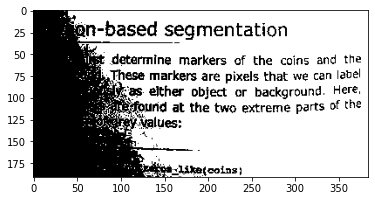

In [28]:
thres = np.zeros(np.shape(scanned)).astype('uint8')
threshold = 150
thres[scanned<threshold] = 0
thres[scanned>=threshold] = 255
plt.imshow(thres, cmap='gray')

Change the value of the threshold in the above programme and see the changes!

Now consider gradual thresholding. We consider that the region of interest lies between intensity values of 100 and 170.

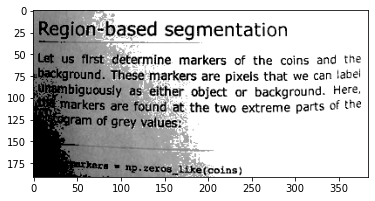

In [29]:
thres1 = scanned
threshold_hi = 170
threshold_lo = 100
thres1[scanned<threshold_lo] = 0
thres1[scanned>threshold_hi] = 255
plt.imshow(thres1, cmap='gray');

#### Bit Plane Slicing
1. Sometimes it is desirable to highlight the contribution made by specific bits to the total image appearance.
2. The image can be imagined to be composed of Eight 1-bit planes -- Plane 0 for the LSB plane and Plane 7 for the MSB.
3. The higher order bits contain visually significant data, the lower order plane contain more subtle details.

This can be acomplished by doing a **Bitwise AND** operation. For example, say the intensity of a pixel is 246 in decimal. In binary this would be $(1111\,0110)_2$. So in order to find the value of the 6th bit, one has to siimply do this $(1111\,0110)_2 \odot  (0100\,0000)_2$. The result will simply produce the value of the 6th bit. In other words, $246 \odot 64$ will give you the value of the 6th bit.

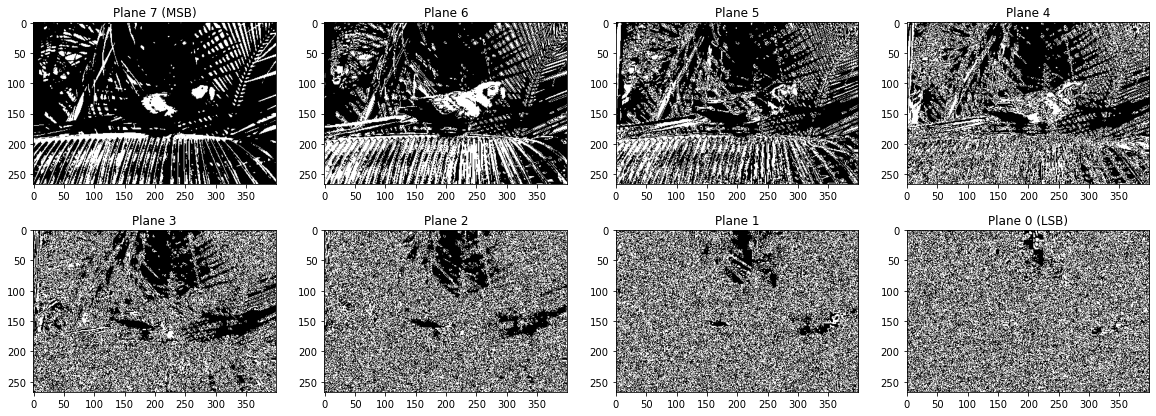

In [30]:
plane7 = A_gr & 128*np.ones(np.shape(A_gr)).astype('uint8')
plane6 = A_gr &  64*np.ones(np.shape(A_gr)).astype('uint8')
plane5 = A_gr &  32*np.ones(np.shape(A_gr)).astype('uint8')
plane4 = A_gr &  16*np.ones(np.shape(A_gr)).astype('uint8')
plane3 = A_gr &   8*np.ones(np.shape(A_gr)).astype('uint8')
plane2 = A_gr &   4*np.ones(np.shape(A_gr)).astype('uint8')
plane1 = A_gr &   2*np.ones(np.shape(A_gr)).astype('uint8')
plane0 = A_gr &   1*np.ones(np.shape(A_gr)).astype('uint8')

plt.figure(figsize=(20,7))
plt.subplot(2, 4, 1)
plt.imshow(plane7, cmap='gray')
plt.title('Plane 7 (MSB)')
plt.subplot(2, 4, 2)
plt.imshow(plane6, cmap='gray')
plt.title('Plane 6')
plt.subplot(2, 4, 3)
plt.imshow(plane5, cmap='gray')
plt.title('Plane 5')
plt.subplot(2, 4, 4)
plt.imshow(plane4, cmap='gray')
plt.title('Plane 4')
plt.subplot(2, 4, 5)
plt.imshow(plane3, cmap='gray')
plt.title('Plane 3')
plt.subplot(2, 4, 6)
plt.imshow(plane2, cmap='gray')
plt.title('Plane 2')
plt.subplot(2, 4, 7)
plt.imshow(plane1, cmap='gray')
plt.title('Plane 1')
plt.subplot(2, 4, 8)
plt.imshow(plane0, cmap='gray')
plt.title('Plane 0 (LSB)');

### Spatial Filtering
**Low pass filters** attenuate or eliminate high frequncy components in the Fourier domain. Low pass filtering gives rise to image blurring.

**High pass filters** attenuate or eliminate low frequncy components in the Fourier domain. High pass filtering gives rise to sharpening of edges and other sharp details.

#### How to implement?
Utilize suitable **2D** masks of suitable size, e.g. $3 \times 3$, $5 \times 5$ or $7 \times 7$.
In most of our use cases, we shall restrict ourselves to $3 \times 3$ masks. The mask is applied to certain pixels. Upon application, the mask calculates a wighted sum of the neighbourhood of the concerned pixel and the result substitutes the original pixel. Here is how it works.

Consider that there is a pixel of intensity $z_5$. The $3 \times 3$ neighbourhood of the pixel can be seen as $$\left[\begin{array}{ccc}
z_{1} & z_{2} & z_{3}\\
z_{4} & z_{5} & z_{6}\\
z_{7} & z_{8} & z_{9}
\end{array}\right].$$
Now consider that the mask that is applied on the pixel with intensity $z_5$ looks like $$\left[\begin{array}{ccc}
w_{1} & w_{2} & w_{3}\\
w_{4} & w_{5} & w_{6}\\
w_{7} & w_{8} & w_{9}
\end{array}\right].$$

Then, it will substitute $z_5$ by $w_1 z_1 + w_2 z_2 + \cdots + w_9 z_9$. Thus, $$z_{5\{new\}}=\sum_{i=1}^9 w_i z_i.$$

Thus, 
$$\left[\begin{array}{ccc}
z_{1} & z_{2} & z_{3}\\
z_{4} & z_{5} & z_{6}\\
z_{7} & z_{8} & z_{9}
\end{array}\right] \otimes
\left[\begin{array}{ccc}
w_{1} & w_{2} & w_{3}\\
w_{4} & w_{5} & w_{6}\\
w_{7} & w_{8} & w_{9}
\end{array}\right] = 
\left[\begin{array}{ccc}
z_{1} & z_{2} & z_{3}\\
z_{4} & \sum_{i=1}^9 w_i z_i & z_{6}\\
z_{7} & z_{8} & z_{9}
\end{array}\right].$$

It does not do any changes to any other pixel anyway. The mask is centred on the image pixel whose new intensity value is tobe calculated. This calculation is performed for each pixel seperately by moving the mask to centre it on the pixel under consideration.


#### Smoothig spatial filters
#### Low pass spatial filtering
Examples of low pass spatial filter masks are

$$\mathcal{L}_1 = \dfrac{1}{9}\left[\begin{array}{ccc}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{array}\right]; \quad\quad
\mathcal{L}_2 = \dfrac{1}{16}\left[\begin{array}{ccc}
1 & 2 & 1\\
2 & 4 & 2\\
1 & 2 & 1
\end{array}\right]$$

1. A low pass filter must have all positive coefficients.
2. For a low pass spatial filter mask shown as $\mathcal{L}_1$, the operation is also popularly termed as neighbourhood averaging. This averaging causes blurring and loss of sharpness.
3. For a filter mask shown in $\mathcal{L}_2$, it is called weighted averaging. 

####Median filtering
Median filters are **nonlinear** (why?) filters employed with an objective of noise reduction, withot bluring.

$$\underset{\textrm{image section under consideration}}{\underbrace{\left[\begin{array}{ccc}
z_{1} & z_{2} & z_{3}\\
z_{4} & z_{5} & z_{6}\\
z_{7} & z_{8} & z_{9}
\end{array}\right]}} \underset{\textrm{median filtering}}{\Rightarrow} 
\underset{\textrm{result of median filtering}}{\underbrace{\left[\begin{array}{ccc}
z_{1} & z_{2} & z_{3}\\
z_{4} & \textrm{med}\{z_{5}\} & z_{6}\\
z_{7} & z_{8} & z_{9}
\end{array}\right]}},$$
where $\textrm{med}\{z_{5}\}$ is the median of $z_1, z_2, \cdots, z_9$. Median value can be easily calculated by arranging $z_1, z_2, \cdots, z_9$ in ascending order of maginitude and then finding the value that is in the middle position.

This filter is most effective when the noise pattern consists of niose-like components and it is of utmost importance to preserve edge sharpness. 

Now we shall use **scikit-image**. There are many built in filters. Check http://scikit-image.org/docs/stable/api/skimage.filters.html for more.

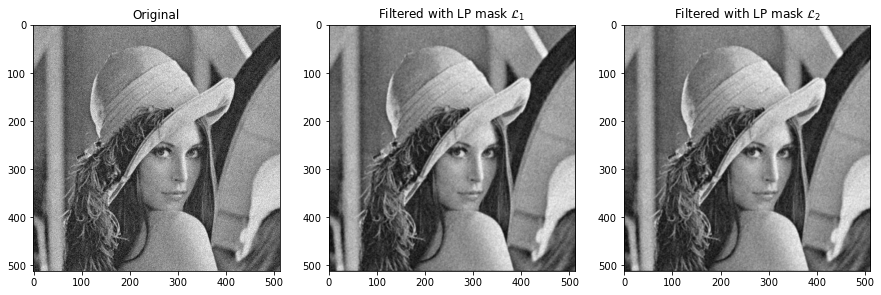

In [31]:
# mean filtering
from scipy import ndimage


lena_noisy = plt.imread('images/lena_noisy.png')
mask1 = (1/9)*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) #LP mask
mask2 = (1/16)*np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]]) #LP mask
result1 = ndimage.convolve(lena_noisy, mask1, mode='constant', cval=0.0)
result2 = ndimage.convolve(lena_noisy, mask2, mode='constant', cval=0.0)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(lena_noisy, cmap='gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(result1, cmap='gray')
plt.title('Filtered with LP mask $\mathcal{L}_1$')
plt.subplot(1, 3, 3)
plt.imshow(result2, cmap='gray')
plt.title('Filtered with LP mask $\mathcal{L}_2$');

See that the low pass filter significantly reduces the noise level.

Now let us apply median filtering to the same image.

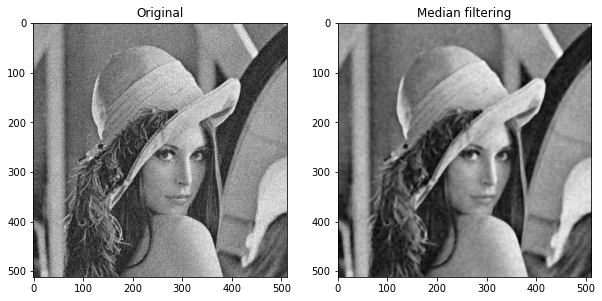

In [32]:
from skimage.morphology import disk #needed for the mask
from skimage.filters.rank import median
import skimage


lena_med = median(skimage.util.img_as_ubyte(lena_noisy), disk(3))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena_noisy, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(lena_med, cmap='gray')
plt.title('Median filtering');

As one can easily see, an image corrupted with **speckle noise** can be better denoised with mean filtering. Now check an image with **salt and pepper noise**.

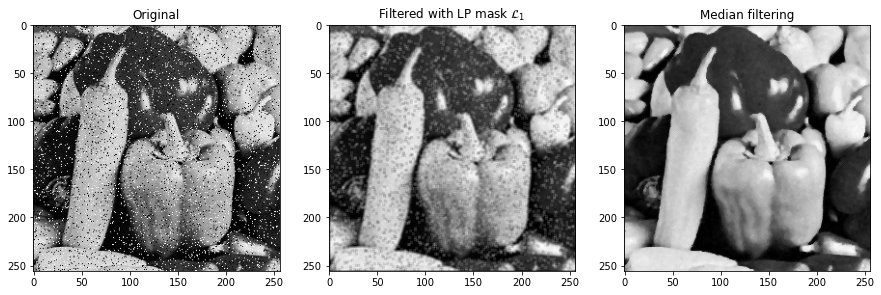

In [33]:
from skimage.morphology import disk #needed for the mask
from skimage.filters.rank import median
from skimage.io import imread


salt = imread('images/saltandpepper.jpg')
mask = (1/9)*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
salt_lp = ndimage.convolve(salt, mask, mode='constant', cval=0.0)
salt_med = median(salt, disk(2))
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(salt, cmap='gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(salt_lp, cmap='gray')
plt.title('Filtered with LP mask $\mathcal{L}_1$')
plt.subplot(1, 3, 3)
plt.imshow(salt_med, cmap='gray')
plt.title('Median filtering');

See the difference!

#### Sharpening spatial filters
#### Derivative filters
1. The differentiation operation is expected to sharpen an image.
2. One can use either first derivative or second derivative information.

**Digital approximation of first derivative** : $\dfrac{\partial f(x,y)}{\partial x} = f(x+1, y) - f(x, y), $ and $\dfrac{\partial f(x,y)}{\partial y} = f(x, y+1) - f(x, y).$

*Constraints* : The response of a first derivative filter must be
1. zero in areas of constant intensity,
2. must be non-zero at the onset of an intensity step or ramp,
3. nonzero along ramps.

**Digital approximation of second derivative** : $\dfrac{\partial ^2f(x,y)}{\partial x^2} = f(x+1, y) - 2 f(x, y) +f(x-1, y),$ and $\dfrac{\partial ^2f(x,y)}{\partial y^2} = f(x, y+1) - 2 f(x, y) +f(x, y-1).$

*Constraints* : The response of a second order derivative filter must be
1. zero in areas of constant intensity,
2. non-zero at the onset and the end of an intensity step or ramp,
3. zero along ramps of constant slope.

#### Implementing a first derivative filter for image sharpening
A first derivative image sharpening filter can be implemented by by applying the Gradient function. The gradient of a function $f(x, y)$ at coordinates $(x, y)$ is defined as the **2D** column vector 

$$\nabla f(x,y)\equiv\mathrm{grad}(f)\equiv \mathbf{g} \equiv \left[\begin{array}{c}
g_{x}(x,y)\\
g_{y}(x,y)
\end{array}\right]=\left[\begin{array}{c}
\frac{\partial f(x,y)}{\partial x}\\
\frac{\partial f(x,y)}{\partial y}
\end{array}\right].$$

The magnitude (length) of vector $\nabla f$ is given by $M(x, y) = ||\nabla f||= \sqrt{\mathbf{g}^T \mathbf{g}} = \sqrt{g_x^2 + g_y^2}$. In image processing, this last expression is often approximated as $|g_x| + |g_y|$.

$M(x, y)$ is an image of the same size of the original and called the **gradient image**. The computation of this gradient is the basis of various approaches to develop first derivative filter. 

If $$\left[\begin{array}{ccc}
z_{1} & z_{2} & z_{3}\\
z_{4} & z_{5} & z_{6}\\
z_{7} & z_{8} & z_{9}
\end{array}\right]$$ 

is the image section under consideration, then, according to the above theory, after the application of first derivative filtering, the new value of $z_5$ will be $$M(x,y) = [(z_8 - z_5)^2 + (z_6 - z_5)^2]^{1/2} \approx |z_8 - z_5| + |z_6 - z_5|.$$ Another implementation involves cross-differences: $$M(x,y) = [(z_9 - z_5)^2 + (z_8 - z_6)^2]^{1/2} \approx |z_9 - z_5| + |z_8 - z_6|.$$ But there is one problem : masks of **even** size are awkward to implement (why?). Hence an approximation with $3 \times 3$ neighbourhood is preferred. The mostly used first order derivative masks are Sobel masks and Prewitt masks. They are like follows : 

$$\mathcal{S}_{y}=\underset{\textrm{Sobel horizontal derivative}}{\underbrace{\left[\begin{array}{ccc}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{array}\right]}}; \quad
\mathcal{S}_{x}=\underset{\textrm{Sobel vertical derivative}}{\underbrace{\left[\begin{array}{ccc}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{array}\right]}}; \quad
\mathcal{P}_{y}=\underset{\textrm{Prewitt horizontal derivative}}{\underbrace{\left[\begin{array}{ccc}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1
\end{array}\right]}}; \quad
\mathcal{P}_{x}=\underset{\textrm{Prewitt vertical derivative}}{\underbrace{\left[\begin{array}{ccc}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1
\end{array}\right]}}
.$$
Now, lets get to work!

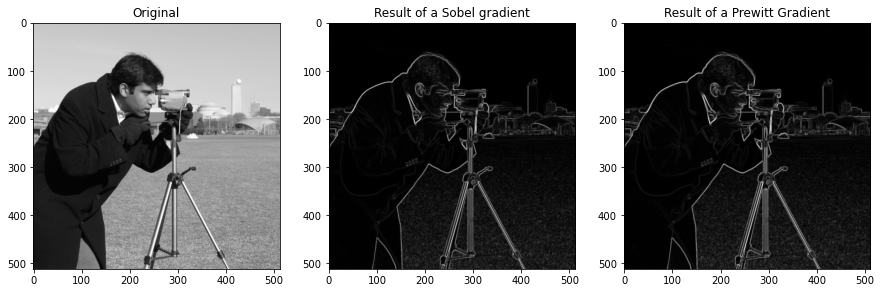

In [34]:
from skimage import filters, data


camera = data.camera()

# apply sobel gradient
sobel_camera = filters.sobel(camera)

# apply prewitt gradient
prewitt_camera = filters.prewitt(camera)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(camera, cmap='gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(sobel_camera, cmap='gray')
plt.title('Result of a Sobel gradient')
plt.subplot(1, 3, 3)
plt.imshow(prewitt_camera, cmap='gray')
plt.title('Result of a Prewitt Gradient');

Another Example

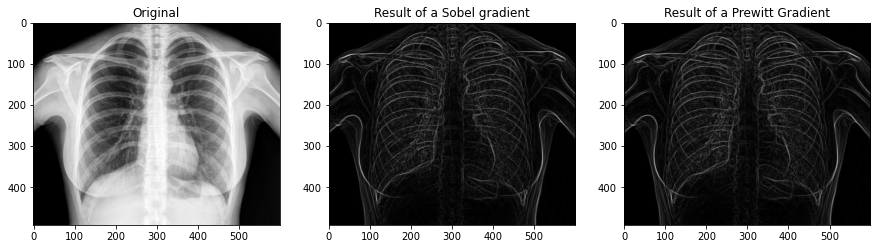

In [35]:
from skimage import filters, data


xray = plt.imread('images/chestxray.jpg')

#apply sobel gradient
sobel_xray = filters.sobel(xray)

#apply prewitt gradient
prewitt_xray = filters.prewitt(xray)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(xray, cmap='gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(sobel_xray, cmap='gray')
plt.title('Result of a Sobel gradient')
plt.subplot(1, 3, 3)
plt.imshow(prewitt_xray, cmap='gray')
plt.title('Result of a Prewitt Gradient');

#### Laplacian filter
A second order derivative filter can be implemented by employing a Laplacian mask. The Laplacian of an image function $f(x, y)$ of two variables is defined as $\nabla ^2 f(x, y) = \dfrac{\partial ^2f(x,y)}{\partial x^2} + \dfrac{\partial ^2f(x,y)}{\partial y^2}.$ 

Thus, $\nabla ^2 f(x, y) = f(x+1, y) + f(x-1, y) + f(x, y+1) + f(x, y-1) - 4f(x,y)$.
So, a Laplacian mask would look like

$$\nabla^2_\perp=\underset{\textrm{Laplacian mask}}{\underbrace{\left[\begin{array}{rrr}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{array}\right]}}; \quad
\nabla^2_\odot=\underset{\textrm{Omnidirectional Laplacian mask}}{\underbrace{\left[\begin{array}{rrr}
1 & 1 & 1\\
1 & -8 & 1\\
1 & 1 & 1
\end{array}\right]}}.$$
The second one, here, considers four directions 1. horizontal, 2. vertical, 3. +45$^\circ$ and 4. -45$^\circ$, whereas, the first one only considers the horizontal and vertical directions.

However, there is a problem regarding the direct implementation of a Laplacian mask. Being a second derivative operation, it highlights intensity discontinuities in an image, and in the process de-emphasizes image regions having slow variations in intensity profile. SO, in order to preserve the original background features and yet perform sharpening operation, the Laplacian operator is utilized in the following manner:
$$g(x,y) = f(x, y) + c\left[\nabla^2 f(x, y)\right],$$ where, $c=-1$ for the operators we considered.

Here is a comparison of Laplacian filter with Sobel filters. For the first time, we are going to use OpenCV.

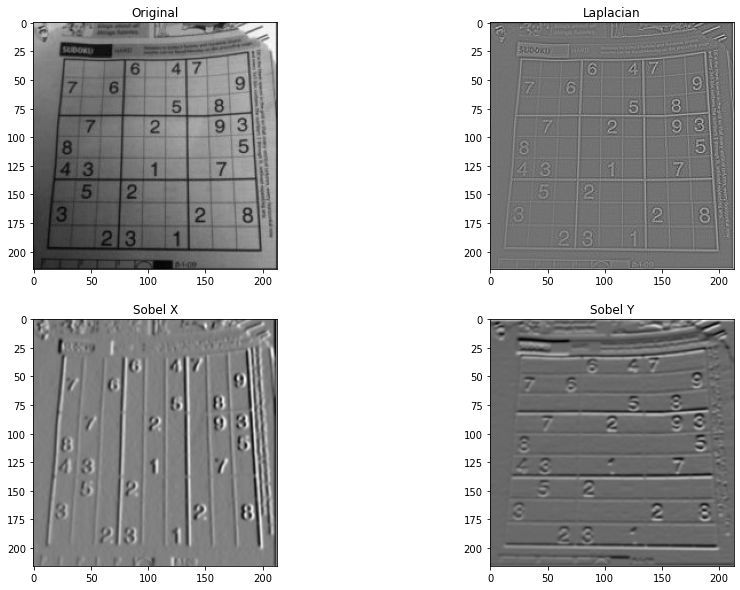

In [36]:
import cv2 # this is OpenCV
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('images/dave.jpg',0) #import the image as grayscale

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')
plt.subplot(2,2,3)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.subplot(2,2,4)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')

plt.show()

You can also use Scikit-image to achieve the same goals.

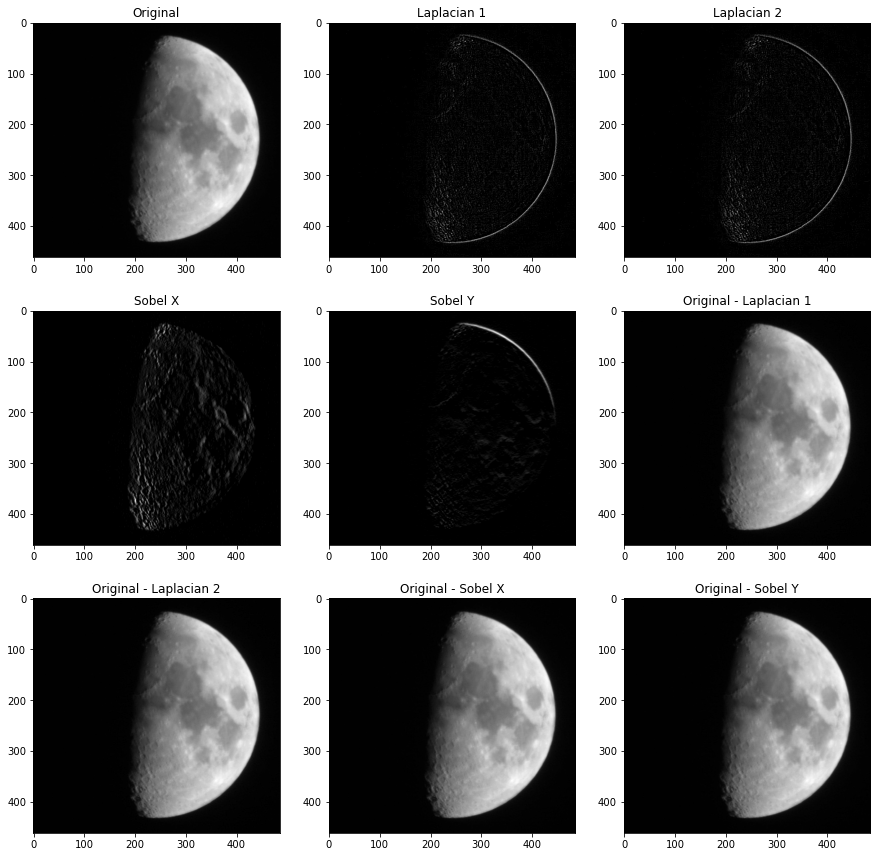

In [37]:
from skimage import img_as_ubyte, img_as_int
from scipy import ndimage
import cv2


moon = cv2.imread('images/blurry_moon.jpg',0)
img = img_as_int(moon)
laplacian1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype='float64')  #Laplacian 1 mask
laplacian2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype='float64') / 3.0 #Laplacian 2 mask
sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype='float64') / 4.0 #Sobel x mask
sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype='float64') / 4.0 #Sobel y mask

out_laplacian1 = img_as_ubyte(ndimage.convolve(img, laplacian1, mode='constant', cval=0.0))
out_laplacian2 = img_as_ubyte(ndimage.convolve(img, laplacian2, mode='constant', cval=0.0))
out_sobelx = img_as_ubyte(ndimage.convolve(img, sobelx, mode='constant', cval=0.0))
out_sobely = img_as_ubyte(ndimage.convolve(img, sobely, mode='constant', cval=0.0))
img_out_laplacian1 = img_as_ubyte(img - out_laplacian1)
img_out_laplacian2 = img_as_ubyte(img - out_laplacian2)
img_out_sobelx = img_as_ubyte(img - out_sobelx)
img_out_sobely = img_as_ubyte(img - out_sobely)

plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.subplot(3,3,2)
plt.imshow(out_laplacian2, cmap = 'gray')
plt.title('Laplacian 1')
plt.subplot(3,3,3)
plt.imshow(out_laplacian2, cmap = 'gray')
plt.title('Laplacian 2')
plt.subplot(3,3,4)
plt.imshow(out_sobelx, cmap = 'gray')
plt.title('Sobel X')
plt.subplot(3,3,5)
plt.imshow(out_sobely, cmap = 'gray')
plt.title('Sobel Y')
plt.subplot(3,3,6)
plt.imshow(img_out_laplacian1, cmap = 'gray')
plt.title('Original - Laplacian 1')
plt.subplot(3,3,7)
plt.imshow(img_out_laplacian2, cmap = 'gray')
plt.title('Original - Laplacian 2')
plt.subplot(3,3,8)
plt.imshow(img_out_sobelx, cmap = 'gray')
plt.title('Original - Sobel X')
plt.subplot(3,3,9)
plt.imshow(img_out_sobely, cmap = 'gray')
plt.title('Original - Sobel Y');

Now, check out Python Imaging Library (fork: pillow). It contains many built in spatial filter modules.

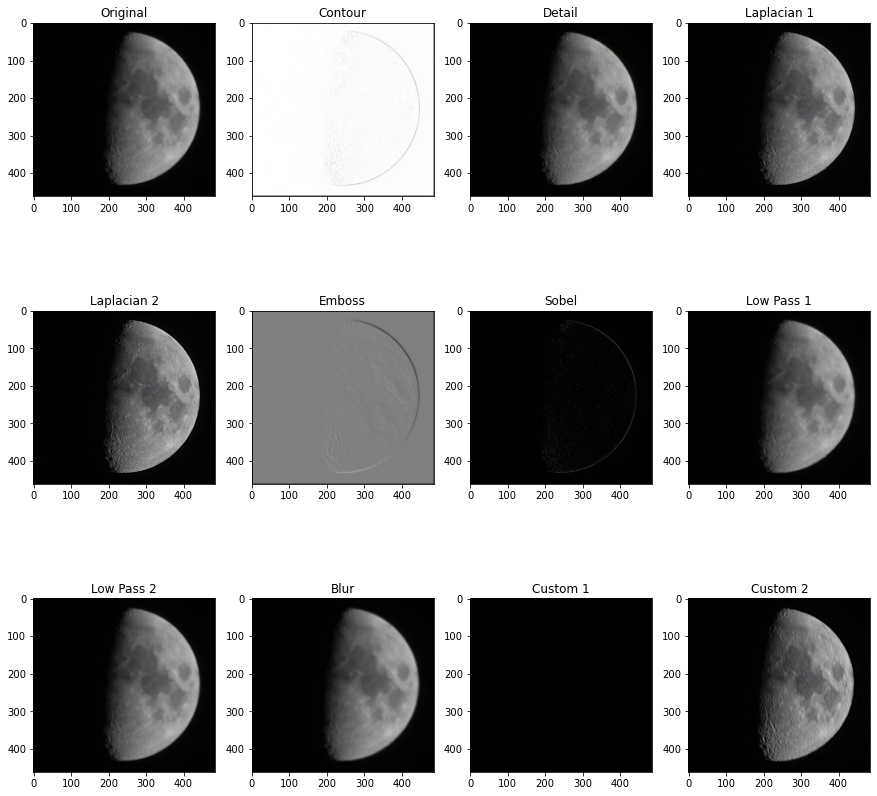

In [38]:
from PIL import Image
from PIL import ImageFilter
    
    
im0 = Image.open('images/blurry_moon.jpg')

plt.figure(figsize=(15,15))
plt.subplot(3,4,1)
plt.imshow(im0)
plt.title('Original')
plt.subplot(3,4,2)
im2 = im0.filter(ImageFilter.CONTOUR)
plt.imshow(im2)
plt.title('Contour')
plt.subplot(3,4,3)
im3 = im0.filter(ImageFilter.DETAIL) 
plt.imshow(im3)
plt.title('Detail')
plt.subplot(3,4,4)
im4 = im0.filter(ImageFilter.EDGE_ENHANCE) 
plt.imshow(im4)
plt.title('Laplacian 1')
plt.subplot(3,4,5)
im5 = im0.filter(ImageFilter.EDGE_ENHANCE_MORE)  
plt.imshow(im5)
plt.title('Laplacian 2')
plt.subplot(3,4,6)
im6 = im0.filter(ImageFilter.EMBOSS)  
plt.imshow(im6)
plt.title('Emboss')
plt.subplot(3,4,7)
im7 = im0.filter(ImageFilter.FIND_EDGES)
plt.imshow(im7)
plt.title('Sobel')
plt.subplot(3,4,8)
im8 = im0.filter(ImageFilter.SMOOTH)  
plt.imshow(im8)
plt.title('Low Pass 1')
plt.subplot(3,4,9)
im9 = im0.filter(ImageFilter.SMOOTH_MORE) 
plt.imshow(im9)
plt.title('Low Pass 2')
plt.subplot(3,4,10)
im10 = im0.filter(ImageFilter.SHARPEN)
plt.imshow(im10)
plt.title('Sharpen')
plt.subplot(3,4,10)
im1 = im0.filter(ImageFilter.BLUR)
plt.imshow(im1)
plt.title('Blur')

#Custom mask

size = (3, 3)
kernel1 = [1, 1, 1, 0, 0, 0, -1, -1, -1]
ker1 = ImageFilter.Kernel(size, kernel1, scale=None, offset=0)
plt.subplot(3,4,11)
im11 = im0.filter(ker1)
plt.imshow(im11)
plt.title('Custom 1')

kernel2 = [1, 0, -1, 1, 0, -1, 0, 0, -1]
ker2 = ImageFilter.Kernel(size, kernel2, scale=None, offset=0)
plt.subplot(3,4,12)
im12 = im0.filter(ker2)
plt.imshow(im12)
plt.title('Custom 2');

**An important point to note** : For a high pass spatial filter mask , whether utilizing first derivative or second derivative, the sum of the mask coefficients is always zero.

#### Unsharp masking and high boost filtering
This approach sharpens an image using kind of a 'back-calculation' method! Let the original image function be $f(x, y)$. First, a blurred version of the image is created. Let this version be $\bar{f}(x,y)$. Then this blurred version is subtracted from the original image. This creates a mask like $g_{mask}(x,y) = f(x, y) - \bar{f}(x,y)$. Then this mask is added to the original image resulting $g(x,y) = f(x,y) + k\,g_{mask}(x,y)$, where, $k$ is a constant. 

If $k=1$, this process is called **unsharp masking**. When $k>1$, it is called **high boost filtering**. 

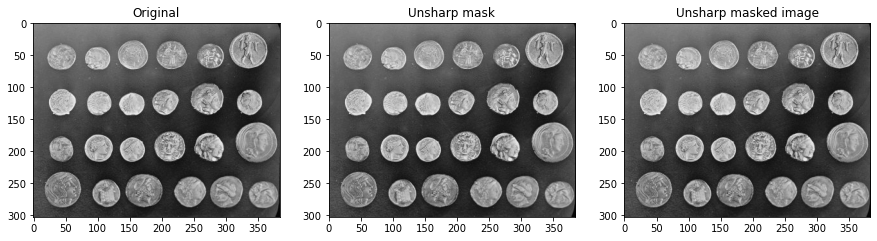

In [39]:
from skimage import data
from skimage import img_as_ubyte, img_as_int
from scipy import ndimage


coins = img_as_int(data.coins())
low_pass = (1/9)*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype='float64') #LP mask
blurred = ndimage.convolve(img_as_ubyte(coins), low_pass, mode='constant', cval=0.0)
unsharp_mask = img_as_ubyte(coins - blurred)
k = 1
sharpened = img_as_ubyte(coins + k*unsharp_mask)

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(coins, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Unsharp mask')
plt.imshow(unsharp_mask, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Unsharp masked image')
plt.imshow(sharpened, cmap='gray');

### Frequency Domain Approaches
Once we are comfortable with the spatial domain image enhancement techniques described above, we are ready to jump into a completely different approach towards image processing. Instead of directly manipulating the pixels in an image, we will now manipulate the **Fourier Transform** of the image. We would utilize the concept of ***2D*** **Discrete Fourier Transform (DFT)**, **Fast Fourier Transform (FFT)** and the Convolution theorem in 2 dimensions. 

The 2D DFT pair for an image function $f(x,y)$ can be expressed as $$F(u, v) = \frac{1}{MN} \sum _{x=0}^{M-1} \sum _{y=0}^{N-1} f(x,y) \exp\left[-j2\pi\left(\frac{ux}{M}+\frac{vy}{N}\right)\right],$$ for $x=0,1,\cdots,M-1$ and $y=0,1,\cdots,N-1$, and 
$$f(x,y) =\sum _{u=0}^{M-1} \sum _{v=0}^{N-1} f(x,y) \exp\left[j2\pi\left(\frac{ux}{M}+\frac{vy}{N}\right)\right],$$ for $u=0,1,\cdots,M-1$ and $v=0,1,\cdots,N-1$.

The convolution theorem in 2D states that, $$h(x,y)* f(x,y) \rightleftharpoons H(u,v)F(u,v),$$ and $$ H(u,v)*F(u,v) \rightleftharpoons h(x,y)f(x,y).$$

In image enhancement problems, $f(x,y)$ is the input image, $g(x,y)$ is the output image and it is obtained by the application of a linear position invariant operator $h(x,y)$ on $f(x,y)$. Thus, $g(x,y)=h(x,y)* f(x,y),$ and $G(u,v)=H(u,v)* F(u,v)$. Here, $G(u,v)$, $H(u,v)$, and $F(u,v)$ are the DFTs of $g(x,y)$, $h(x,y)$ and $f(x,y)$ respectively. $H(u,v)$ is often called the **process transfer function**.

The main goal in frequency domain approach in image enhancement is to select a suitable $H(u,v)$ such that $g(x,y)$ exhibit some highlighted feature of $f(x,y)$.

Image processing in frequency domain usually involves the following steps:

INPUT : $f(x,y)$
1. Preprocess the input image $f(x,y)$
2. Take its DFT or FFT
3. Multiply the result with a suitable process transfer function $H$
4. Take the IDFT or IFFT of the result
5. Do some post-processing

OUTPUT : Enhanced image $g(x,y)$.

As an example, 
for Low Pass filtering one can using the Gaussian LPF TRansfer Function 
$$H_{GLPF}(u,v)=\exp\left[-\frac{D(u,v)}{2\sigma^2}\right],$$
and for High Pass filtering, one can use this:
$$H_{GHPF}(u,v)=1-\exp\left[-\frac{D(u,v)}{2\sigma^2}\right].$$
Here, $D(u,v)$ is the distance of the point $(u,v)$ from the origin of the frequency plane, and $\sigma$ (std. deviation) is a measure of the spread of the Gaussian curve.

One can apply this to an image simply by using a built-in module in `skimage`.

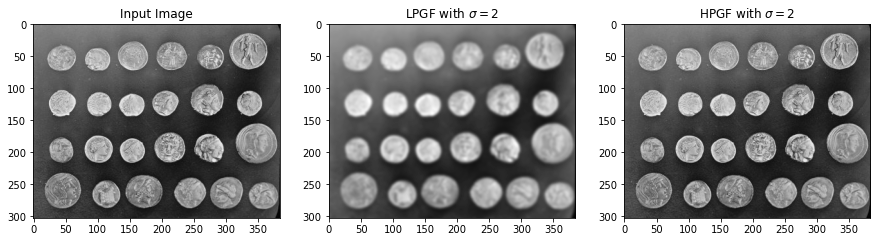

In [40]:
from skimage import data
from skimage.filters import gaussian


image = data.coins()
lpgf_img = gaussian(image, sigma=2)
hpgf_img = image - lpgf_img

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.subplot(132)
plt.imshow(lpgf_img, cmap = 'gray')
plt.title('LPGF with $\sigma=2$')
plt.subplot(133)
plt.imshow(hpgf_img, cmap = 'gray')
plt.title('HPGF with $\sigma=2$')
plt.show()

Now we will see how to find Fourier Transform using Numpy. Numpy has an FFT package to do this. `np.fft.fft2()` provides us the frequency transform which will be a complex array. Its first argument is the input image, which is grayscale. Second argument is optional which decides the size of output array. If it is greater than size of input image, input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped. If no arguments passed, Output array size will be same as input.

Now once you got the result, zero frequency component (DC component) will be at top left corner. If you want to bring it to center, you need to shift the result by $\frac{N}{2}$ in both the directions. This is simply done by the function, `np.fft.fftshift()`. (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.

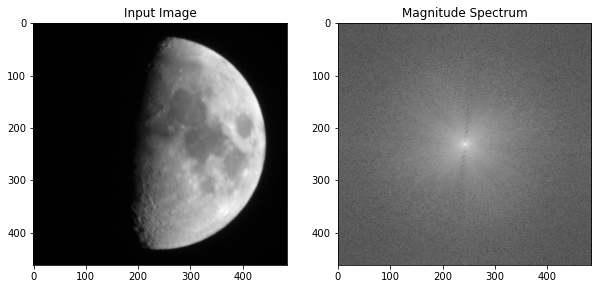

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('images/blurry_moon.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

See, You can see more whiter region at the center showing low frequency content is more.

So you found the frequency transform Now you can do some operations in frequency domain, like high pass filtering and reconstruct the image, ie find inverse DFT. For that you simply remove the low frequencies by masking with a rectangular window of size $60\times 60$. Then apply the inverse shift using `np.fft.ifftshift()` so that DC component again come at the top-left corner. Then find inverse FFT using `np.ifft2()` function. The result, again, will be a complex number. You can take its absolute value.

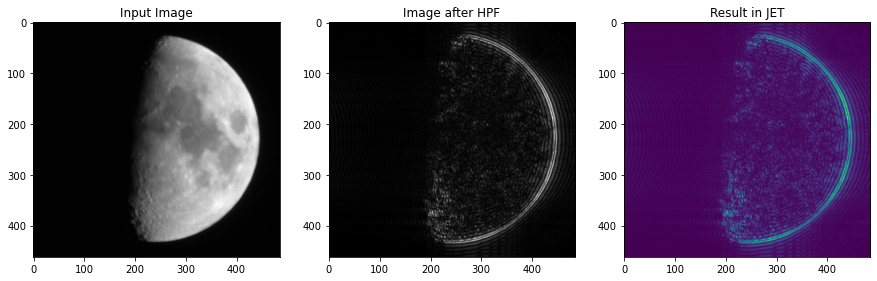

In [42]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(15,5))
plt.subplot(131),plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.subplot(132),plt.imshow(img_back, cmap='gray')
plt.title('Image after HPF')
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET')

plt.show()

The result shows High Pass Filtering is an edge detection operation. This also shows that most of the image data is present in the Low frequency region of the spectrum. Anyway we have seen how to find DFT, IDFT etc in Numpy. Now let’s see how to do it in OpenCV.

If you closely watch the result, especially the last image in JET color, you can see some artifacts. It shows some ripple like structures there, and it is called ringing effects. It is caused by the rectangular window we used for masking. This mask is converted to sinc shape which causes this problem. So rectangular windows is not used for filtering. Better option is Gaussian Windows.

#### Fourier Transform in OpenCV

OpenCV provides the functions `cv2.dft()` and `cv2.idft()` for this. It returns the same result as previous, but with two channels. First channel will have the real part of the result and second channel will have the imaginary part of the result. The input image should be converted to np.float32 first. We will see how to do it.

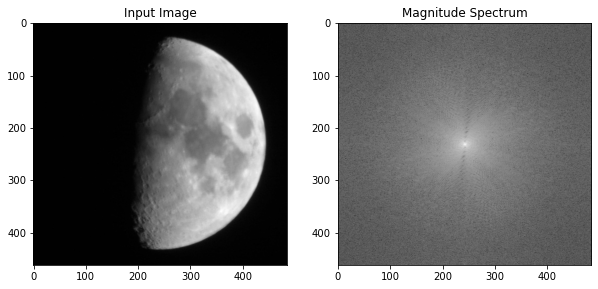

In [43]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


img = cv2.imread('images/blurry_moon.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

So, now we have to do inverse DFT. In previous session, we created a HPF, this time we will see how to remove high frequency contents in the image, ie we apply LPF to image. It actually blurs the image. For this, we create a mask first with high value (1) at low frequencies, ie we pass the LF content, and 0 at HF region.

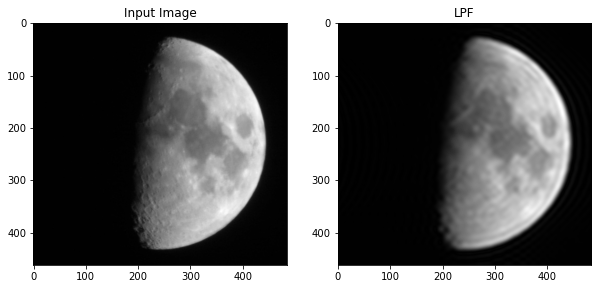

In [44]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('LPF')
plt.show()

**Note** :  As usual, OpenCV functions `cv2.dft()` and `cv2.idft()` are faster than Numpy counterparts. But Numpy functions are more user-friendly.

#### Why Laplacian is a High Pass Filter?
The question is, why Laplacian is a high pass filter? Why Sobel is a HPF? etc. And the simplest answer that can be given to it is in terms of Fourier Transform. Just take the fourier transform of Laplacian for some higher size of FFT. Analyze it:

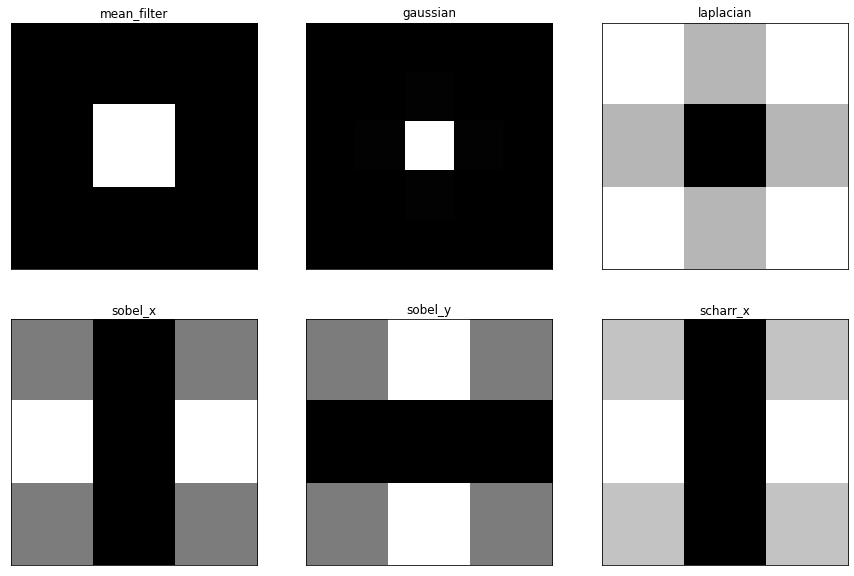

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(mag_spectrum[i],cmap='gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

From image, you can see what frequency region each kernel blocks, and what region it passes. From that information, we can say why each kernel is a HPF or a LPF.